In [1]:
from evwTools import *
plt.rcParams['figure.facecolor'] = 'white'

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana_16536938_15925.00356.root")
#f = r.TFile("./data/gm2offline_ana_13084967_16358.00241.root")
#f = r.TFile("./data/gm2offline_ana_v11_Nov14.root")
#f = r.TFile("./data/dataExternal/Nov7_v08_EnergyFix/results_full_v9_08_00_Nov7_EnergyFix.root")
#f = r.TFile("./data/dataExternal/Nov14_v11_60hr_PartialSet_WrongTimeConstants/results_full_partial_v9_11_Nov14.root")
#f = r.TFile("./data/gm2offline_ana_0_15936.00132.root")
#f = r.TFile("./data/gm2offline_ana_15921_00222.root")

In [3]:
f.cd("farline")
#f.ls()

True

In [4]:
tnon = f.Get("farline").Get("evwNonBackwardsTree")
tnon.Print()
tnon2 = f.Get("farline").Get("wveNonBackwardsTree")
#tnon2.Print()

teast = f.Get("farline").Get("eastTree")
twest = f.Get("farline").Get("eventTree")

#fwave = r.TFile("./data/waveforms_15921_00222.root")
#twave = fwave.Get("islands").Get("islands").Get("islandTree")

******************************************************************************
*Tree    :evwNonBackwardsTree: evwNonBackwardsTree                                    *
*Entries :   366765 : Total =        75458482 bytes  File  Size =   19172935 *
*        :          : Tree compression factor =   3.94                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   366765 : Total  Size=    1472337 bytes  File Size  =      13086 *
*Baskets :       46 : Basket Size=      32000 bytes  Compression= 112.42     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   366765 : Total  Size=    1472487 bytes  File Size  =      13131 *
*Baskets :       46 : Basket Size=      32000 bytes  Compression= 112.04     *
*..........................................

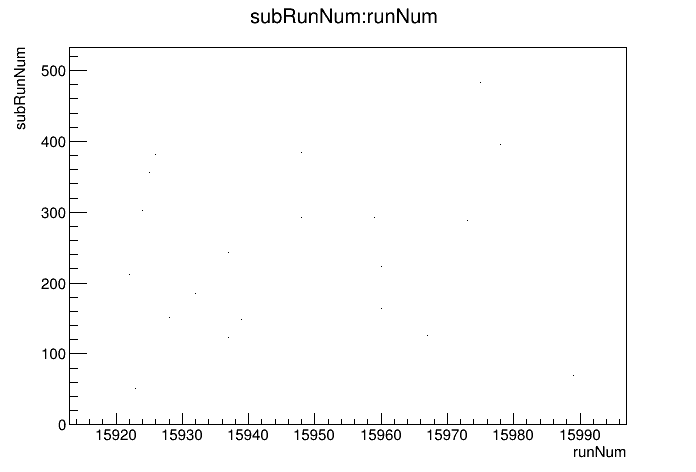

In [5]:
c = r.TCanvas()
tnon2.Draw("subRunNum:runNum")
c.Draw()

In [6]:
ding = []

breakpoint = 100000

runBefore = 0
subRunBefore = 0

fout = r.TFile("temp_tree_storage.root","recreate")
fout.cd()

for i, entry in enumerate(tnon):
    if(i > breakpoint):
        break
        
    if(i % 100 == 0):
        print("Entry:", i+1)
            
    if(entry.subRunNum != subRunBefore or entry.runNum != runBefore):
        fout.cd()
        teast_subrun = teast.CopyTree("runNum == "+str(int(entry.runNum))+" && subRunNum == "+str(int(entry.subRunNum)))
        teast_subrun.SetName("newname_east")
        twest_subrun = twest.CopyTree("runNum == "+str(int(entry.runNum))+" && subRunNum == "+str(int(entry.subRunNum)))
        twest_subrun.SetName("newname_west")
        runBefore = entry.runNum
        subRunBefore = entry.subRunNum
        print((runBefore, subRunBefore))
        fout.Write()
        
    if(entry.timeEast < 100*1000/1.25):
        continue
    
    uniqueID = constructUniqueIDnon(entry)
    conditionEast = constructConditionFromUniqueIDEast(uniqueID)
    conditionWest = constructConditionFromUniqueIDWest(uniqueID)
    
    fout2 = r.TFile("temp_tree_storage2.root","recreate")
    fout2.cd()
    teast_partial = teast_subrun.CopyTree(conditionEast)
    twest_partial = twest_subrun.CopyTree(conditionWest)
    #print("     Matching entries in this file:", teast_partial.GetEntries())
    #print("                                   ", twest_partial.GetEntries())
    
    ding.append((uniqueID, entry.counter, teast_partial.GetEntries(),twest_partial.GetEntries()))
    
    fout2.Write()
    #teast_partial.Delete()
    #twest_partial.Delete()
    

Entry: 1
(15925, 356)
Entry: 101
Entry: 201
Entry: 301
Entry: 401
Entry: 501
Entry: 601
Entry: 701
Entry: 801
Entry: 901
Entry: 1001
Entry: 1101
Entry: 1201
Entry: 1301
Entry: 1401
Entry: 1501
Entry: 1601
Entry: 1701
Entry: 1801
Entry: 1901
Entry: 2001
Entry: 2101
Entry: 2201
Entry: 2301
Entry: 2401
Entry: 2501
Entry: 2601
Entry: 2701
Entry: 2801
Entry: 2901
Entry: 3001
Entry: 3101
Entry: 3201
Entry: 3301
Entry: 3401
Entry: 3501
Entry: 3601
Entry: 3701
Entry: 3801
Entry: 3901
Entry: 4001
Entry: 4101
Entry: 4201
Entry: 4301
Entry: 4401
Entry: 4501
Entry: 4601
Entry: 4701
Entry: 4801
Entry: 4901
Entry: 5001
Entry: 5101
Entry: 5201
Entry: 5301
Entry: 5401
Entry: 5501
Entry: 5601
Entry: 5701
Entry: 5801
Entry: 5901
Entry: 6001
Entry: 6101
Entry: 6201
Entry: 6301
Entry: 6401
Entry: 6501
Entry: 6601
Entry: 6701
Entry: 6801
Entry: 6901
Entry: 7001
Entry: 7101
Entry: 7201
Entry: 7301
Entry: 7401
Entry: 7501
Entry: 7601
Entry: 7701
Entry: 7801
Entry: 7901
Entry: 8001
Entry: 8101
Entry: 8201
Ent

In [7]:
ids, counters, deast, dwest = zip(*ding)

In [8]:
print(len(ids))

27761


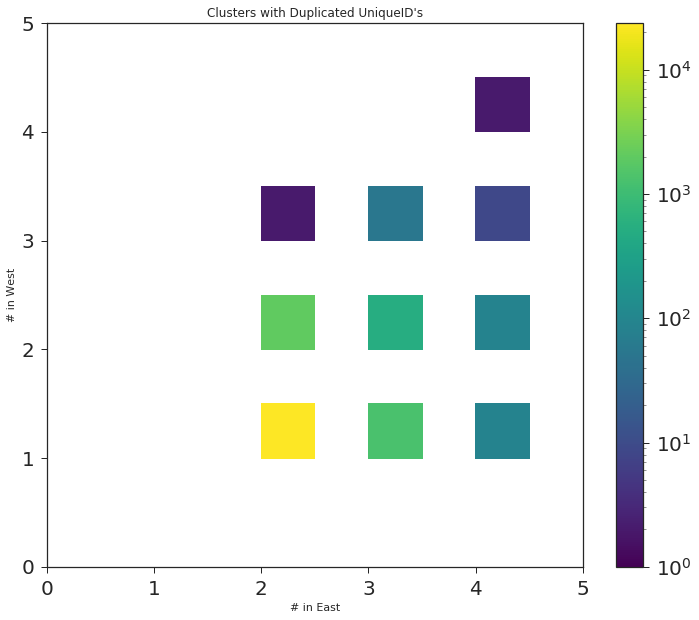

In [9]:
cm = plt.cm.get_cmap('viridis')

fig, ax = plt.subplots(figsize=(12,10))
plt.hist2d(deast,dwest,cmap=cm,vmin=1,norm=matplotlib.colors.LogNorm(),bins=10, range=((0,5),(0,5)))
cm.set_under('white')
plt.colorbar()
plt.title("Clusters with Duplicated UniqueID's")
plt.xlabel("# in East")
plt.ylabel("# in West")

plt.show()

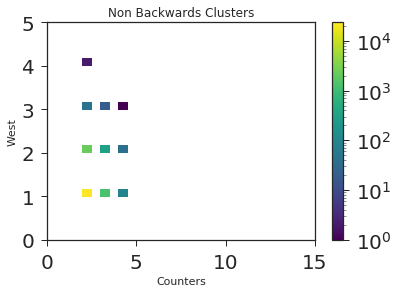

In [10]:
cm = plt.cm.get_cmap('viridis')

plt.hist2d(counters,dwest,cmap=cm,vmin=1,norm=matplotlib.colors.LogNorm(),bins=30, range=((0,15),(0,5)))
cm.set_under('white')
plt.colorbar()
plt.title("Non Backwards Clusters")
plt.xlabel("Counters")
plt.ylabel("West")

plt.show()

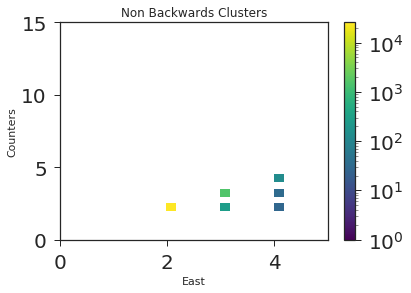

In [11]:
cm = plt.cm.get_cmap('viridis')

plt.hist2d(deast,counters,cmap=cm,vmin=1,norm=matplotlib.colors.LogNorm(),bins=30, range=((0,5),(0,15)))
cm.set_under('white')
plt.colorbar()
plt.title("Non Backwards Clusters")
plt.xlabel("East")
plt.ylabel("Counters")

plt.show()

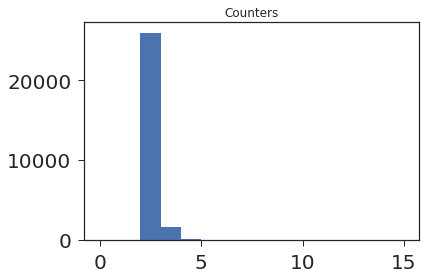

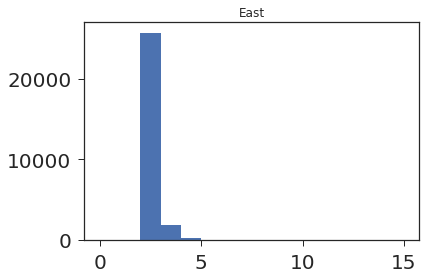

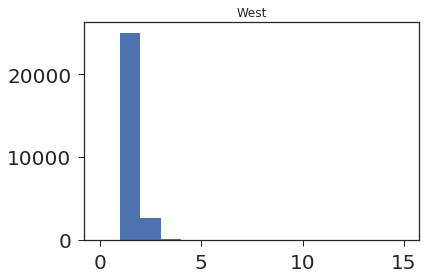

In [12]:
plt.hist(counters,bins=15,range=(0,15))
plt.title("Counters")
plt.show()
plt.hist(deast,bins=15,range=(0,15))
plt.title("East")
plt.show()
plt.hist(dwest,bins=15,range=(0,15))
plt.title("West")
plt.show()

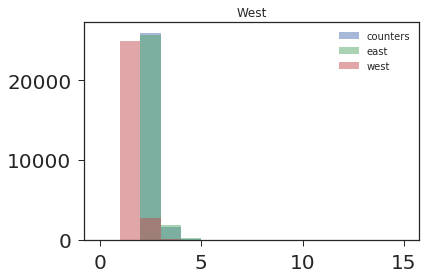

In [13]:
plt.hist(counters,label='counters',bins=15,range=(0,15),alpha=0.5)
plt.title("Counters")
plt.hist(deast,label='east',bins=15,range=(0,15),alpha=0.5)
plt.title("East")
plt.hist(dwest,label='west',bins=15,range=(0,15),alpha=0.5)
plt.title("West")
plt.legend()
plt.show()

In [14]:
breakpoint=int(len(ids))-1

In [15]:
deltaE = []
totalEeast = []
totalEwest = []
timesEast = []
timesWest = []

fout = r.TFile("temp_tree_storage.root","recreate")
runBefore = 0
subRunBefore = 0

for i, entry in enumerate(tnon):
    if((i % 100) == 0):
        print(i, '/', tnon.GetEntries())
        
    if(i > breakpoint):
        break
        
    if(entry.subRunNum != subRunBefore or entry.runNum != runBefore):
        fout.cd()
        teast_subrun = teast.CopyTree("runNum == "+str(int(entry.runNum) )+" && subRunNum == "+str(int(entry.subRunNum)))
        twest_subrun = twest.CopyTree("runNum == "+str(int(entry.runNum) )+" && subRunNum == "+str(int(entry.subRunNum)))
        runBefore = entry.runNum
        subRunBefore = entry.subRunNum
        fout.Write()
        
    
    xtalsEast = []
    xtalsWest = []
    
    energiesWest = []
    energiesEast = []
    
    uniqueID = constructUniqueIDnon(entry)
    conditionEast = constructConditionFromUniqueIDEast(uniqueID)
    conditionWest = constructConditionFromUniqueIDWest(uniqueID)
    
    
    fout2 = r.TFile("temp_tree_storage2.root","recreate")
    fout2.cd()
    teast_partial = teast_subrun.CopyTree(conditionEast)
    twest_partial = twest_subrun.CopyTree(conditionWest)
    #print("     Matching entries in this file:", teast_partial.GetEntries())
    #print("                                   ", twest_partial.GetEntries())
    
    for j, ding in enumerate(twest_partial):
        xtalsWest.append( toFlatMap(ding.crystalsWest) )
        energiesWest.append(ding.energy)
        timesWest.append( (ding.time, dwest[i] ) )
    for ding in teast_partial:
        xtalsEast.append( toFlatMap(ding.crystalsEast) )
        energiesEast.append(ding.energy)
        timesEast.append( (ding.time, deast[i] ) )

    
    totalEeast.append(sum(energiesEast))
    totalEwest.append(sum(energiesWest))
    deltaE.append(sum(energiesWest) - sum(energiesEast))
    
    fout2.Write()

0 / 366765
100 / 366765
200 / 366765
300 / 366765
400 / 366765
500 / 366765
600 / 366765
700 / 366765
800 / 366765
900 / 366765
1000 / 366765
1100 / 366765
1200 / 366765
1300 / 366765
1400 / 366765
1500 / 366765
1600 / 366765
1700 / 366765
1800 / 366765
1900 / 366765
2000 / 366765
2100 / 366765
2200 / 366765
2300 / 366765
2400 / 366765
2500 / 366765
2600 / 366765
2700 / 366765
2800 / 366765
2900 / 366765
3000 / 366765
3100 / 366765
3200 / 366765
3300 / 366765
3400 / 366765
3500 / 366765
3600 / 366765
3700 / 366765
3800 / 366765
3900 / 366765
4000 / 366765
4100 / 366765
4200 / 366765
4300 / 366765
4400 / 366765
4500 / 366765
4600 / 366765
4700 / 366765
4800 / 366765
4900 / 366765
5000 / 366765
5100 / 366765
5200 / 366765
5300 / 366765
5400 / 366765
5500 / 366765
5600 / 366765
5700 / 366765
5800 / 366765
5900 / 366765
6000 / 366765
6100 / 366765
6200 / 366765
6300 / 366765
6400 / 366765
6500 / 366765
6600 / 366765
6700 / 366765
6800 / 366765
6900 / 366765
7000 / 366765
7100 / 366765
7200

In [16]:
fout2.Close()

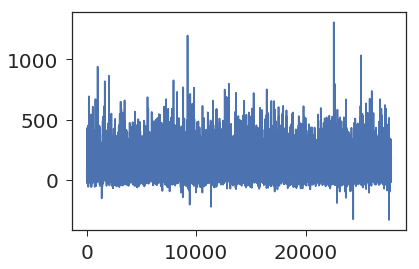

In [17]:
plt.plot(deltaE)
plt.show()

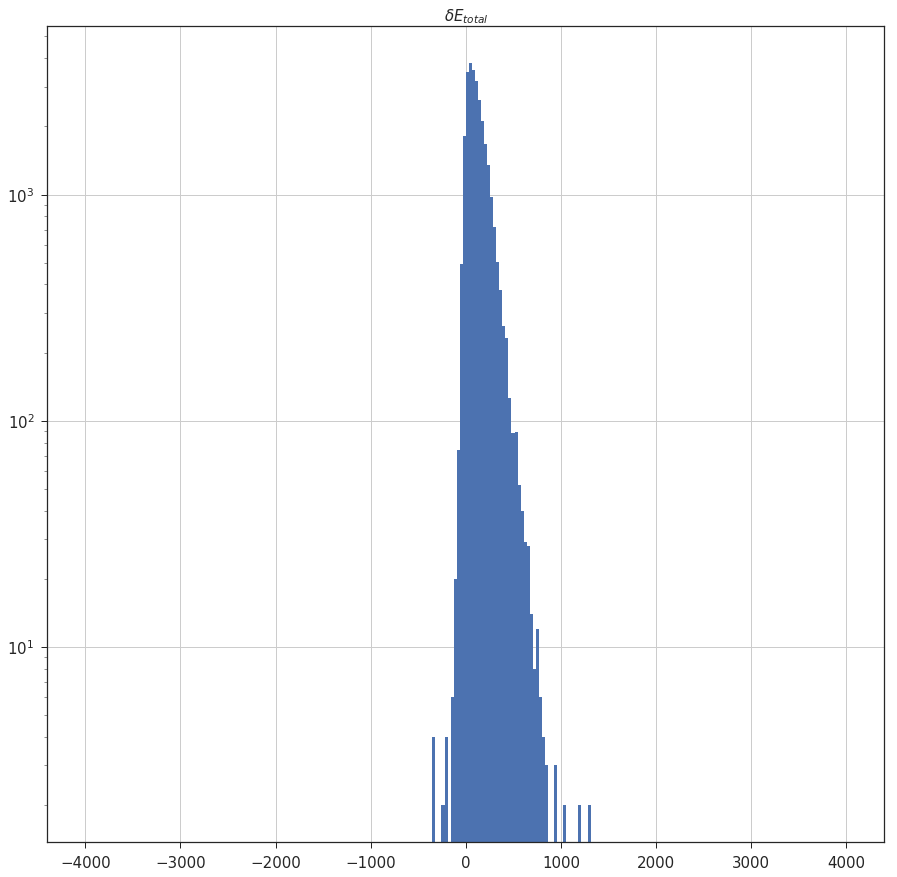

In [20]:
fig,ax = plt.subplots(figsize=(15,15))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', titlesize=15, labelsize=15)
plt.hist([x for x in deltaE],bins=250,range=(-4000,4000))
plt.title("$\delta E_{total}$")
plt.yscale("log")
plt.grid()
plt.show()

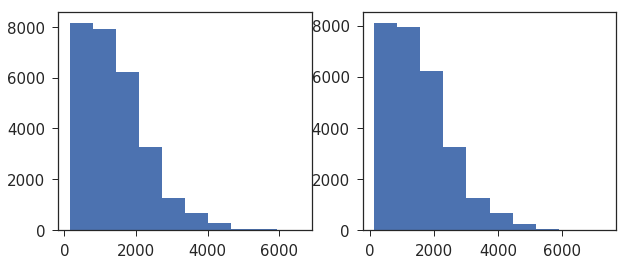

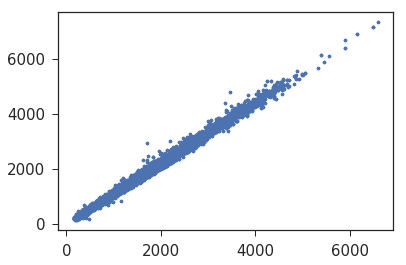

In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(totalEeast)
ax[1].hist(totalEwest)
plt.show()

plt.plot(totalEeast,totalEwest,'.')
plt.show()

In [ ]:
UniqueIDs_2_to_2 = []
energies_2_to_2 = []

fout = r.TFile("temp_tree_storage.root","recreate")
runBefore = 0
subRunBefore = 0

for i, entry in enumerate(tnon):
    if((i % 1000) == 0):
        print(i, '/', tnon.GetEntries())
    
    
    if(entry.subRunNum != subRunBefore or entry.runNum != runBefore):
        fout.cd()
        teast_subrun = teast.CopyTree("runNum == "+str(int(entry.runNum) )+" && subRunNum == "+str(int(entry.subRunNum)))
        twest_subrun = twest.CopyTree("runNum == "+str(int(entry.runNum) )+" && subRunNum == "+str(int(entry.subRunNum)))
        runBefore = entry.runNum
        subRunBefore = entry.subRunNum
        fout.Write()
        
    
    uniqueID = constructUniqueIDnon(entry)
    conditionEast = constructConditionFromUniqueIDEast(uniqueID)
    conditionWest = constructConditionFromUniqueIDWest(uniqueID)
    
    fout2 = r.TFile("temp_tree_storage.root","recreate")
    teast_partial = teast_subrun.CopyTree(conditionEast)
    twest_partial = twest_subrun.CopyTree(conditionWest)
    
    if((teast_partial.GetEntries() == 2) and (twest_partial.GetEntries() == 2)):
        UniqueIDs_2_to_2.append(uniqueID)
        
        energiesWest = []
        energiesEast = []
        for j, ding in enumerate(twest_partial):
            energiesWest.append(ding.energy)
        for ding in teast_partial:
            energiesEast.append(ding.energy)
            
        energies_2_to_2.append ( ( energiesWest , energiesEast ) )
        
    fout2.Write()
        
        
        
print(len(UniqueIDs_2_to_2))

0 / 366765
1000 / 366765
2000 / 366765
3000 / 366765
4000 / 366765
5000 / 366765
6000 / 366765
7000 / 366765
8000 / 366765
9000 / 366765
10000 / 366765
11000 / 366765
12000 / 366765
13000 / 366765
14000 / 366765
15000 / 366765
16000 / 366765
17000 / 366765
18000 / 366765
19000 / 366765
20000 / 366765
21000 / 366765
22000 / 366765
23000 / 366765
24000 / 366765
25000 / 366765
26000 / 366765
27000 / 366765
28000 / 366765


In [ ]:
print(energies_2_to_2[2])

In [ ]:
energies_2_to_2[2][0][0] - energies_2_to_2[2][1][1]

In [ ]:
deltaEs = []

for energies in energies_2_to_2:
    energiesWest = energies[0]
    energiesEast = energies[1]
    
    deltai = []
    
    for ewest in energiesWest:
        ding = [ewest-eeast for eeast in energiesEast]
        mindelta = min(ding, key=abs)
        deltai.append(mindelta)
        
    deltai.sort()
        
    deltaEs.append(deltai)

In [ ]:
for i in range(10):
    print(deltaEs[i])

In [ ]:
de1, de2 = zip(*deltaEs)
c = r.TCanvas()
g2 = r.TGraph()
for i in range(len(de1)):
    g2.SetPoint(i,de1[i],de2[i])

g2.GetXaxis().SetTitle("#deltaE_{smaller} [MeV]")
g2.GetYaxis().SetTitle("#deltaE_{larger} [Mev]")
g2.SetTitle("#deltaE Values for 2:2 Clusters")

g2.SetMarkerStyle(8)
g2.SetMarkerSize(0.3)
g2.SetMarkerColor(38)
    
g2.Fit("pol1")    
g2.Draw("ap")

onetoone = r.TF1("onetoone","pol1",-6000,6000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

c.Draw()

In [ ]:
energiesWest, energiesEast = zip(*energies_2_to_2)
c = r.TCanvas("c","c",1200,500)
c.Divide(2)
c.cd(1)
gwest = r.TGraph()
for i in range(len(energiesWest)):
    gwest.SetPoint(i,min(energiesWest[i]),max(energiesWest[i]))

gwest.GetXaxis().SetTitle("E_{max} [MeV]")
gwest.GetYaxis().SetTitle("E_{min} [Mev]")
gwest.SetTitle("E_{west} Values for 2:2 Clusters")

gwest.SetMarkerStyle(8)
gwest.SetMarkerSize(0.3)
gwest.SetMarkerColor(46)
    
#gwest.Fit("pol1")    
gwest.Draw("ap")
onetoone.Draw("SAME")

c.cd(2)
geast = r.TGraph()
for i in range(len(energiesEast)):
    geast.SetPoint(i,min(energiesEast[i]),max(energiesEast[i]))

geast.GetXaxis().SetTitle("E_{max} [MeV]")
geast.GetYaxis().SetTitle("E_{min} [Mev]")
geast.SetTitle("E_{east} Values for 2:2 Clusters")

geast.SetMarkerStyle(8)
geast.SetMarkerSize(0.3)
geast.SetMarkerColor(30)
    
#geast.Fit("pol1")
geast.Draw("ap")
onetoone.Draw("SAME")
c.Draw()

In [ ]:
timesWestonly, nwest = zip(*timesWest)
plt.plot([x/1000*1.25 for x in timesWestonly],nwest,'.')
plt.ylabel("$N_{west}$")
plt.xlabel("t ($\mu s$)")
plt.show()

In [ ]:
timesEastonly, neast = zip(*timesEast)
plt.plot([x/1000*1.25 for x in timesEastonly],neast,'.')
plt.ylabel("$N_{east}$")
plt.xlabel("t ($\mu s$)")
plt.show()